# Goal

Use XGBoost's feature selection to determine the top features in the preprocessed dataset.

In [21]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('data/cleaned_listings.csv', index_col = [0])

In [8]:
X = df.drop('log_price', axis = 1)
y = df['log_price']
df.head()

has_bathrooms  has_beds  has_security_deposit  has_cleaning_fee  \
0              1         1                     1                 1   
1              1         1                     0                 0   
2              1         1                     1                 1   
3              1         1                     0                 0   
4              1         1                     0                 0   

   has_availability_30  has_days_as_host  has_extra_people  bathrooms_enc  \
0                    1                 1                 1       0.405465   
1                    0                 1                 0       0.000000   
2                    1                 1                 1       0.000000   
3                    1                 1                 0       0.000000   
4                    1                 1                 0       0.000000   

   beds_enc  security_deposit_enc  ...  kba  weibo  sesame  \
0  0.693147              5.298317  ...  0.0    0.0     0.0   
1  0.000000              0.000000  ...  0.0    0.0     0.0   
2  0.000000              5.703782  ...  0.0    0.0     0.0   
3  0.000000              0.000000  ...  0.0    0.0     0.0   
4  0.000000              0.000000  ...  0.0    0.0     0.0   

   host_verifications_enc  property_type_enc  room_type_enc  bed_type_enc  \
0                   170.0               19.0            2.0           5.0   
1                   170.0               23.0            2.0           5.0   
2                   130.0               19.0            3.0           5.0   
3                   175.0               26.0            2.0           5.0   
4                   175.0               19.0            2.0           5.0   

   neighbourhood_cleansed_enc  log_price  accommodates_enc  
0                         8.0   4.077537               2.0  
1                        21.0   4.382027               2.0  
2                        22.0   4.828314               3.0  
3                        22.0   5.010635               2.0  
4                        22.0   4.317488               2.0  

[5 rows x 90 columns]

In [17]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

# Training

In [19]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_val, y_train_val)

[22:36:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# Visualizing Feature Importance

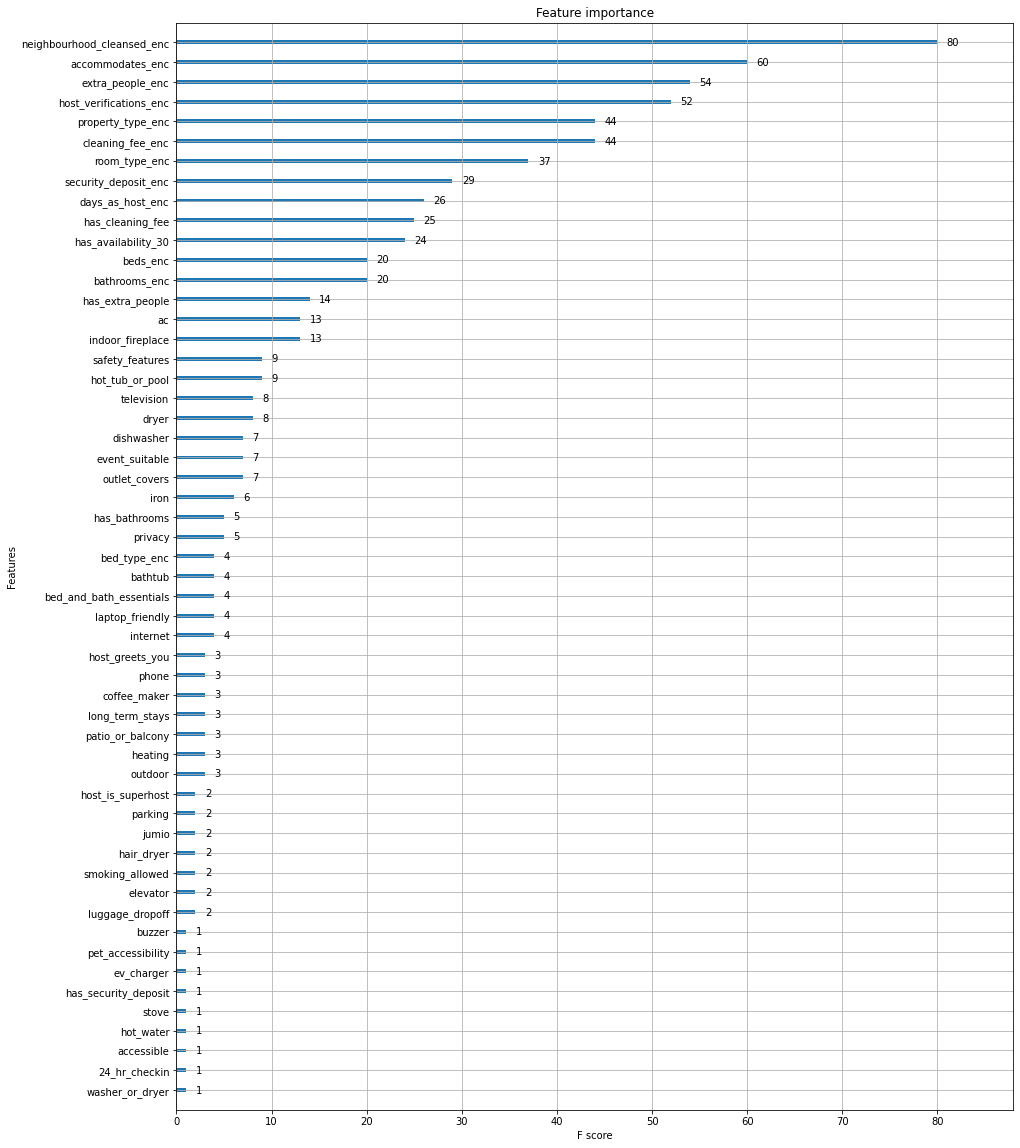

In [22]:
f, ax = plt.subplots(figsize=(15,20))
xgb.plot_importance(xgb_model, ax = ax)
plt.show()